### Autre Méthode de représentation des orbites de Mars et de la Terre sur des cercle (Approximation des orbites circulaires)

Le problème ci dessous qui marche ne fonctionnait pas lors de la semaine 1 et 2. 

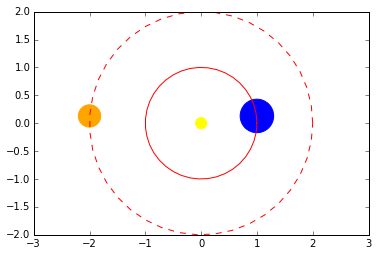

In [89]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#On commence par tracer trois cercles pleines représentants 
#le Soleil, Mars et la Terre (c'est une approximation)

circle1Soleil = plt.Circle((0, 0), 0.1, color='yellow')
circle2Mars = plt.Circle((-2, 0.13), 0.2, color='orange')
circle3Terre = plt.Circle((1, 0.13), 0.3, color='blue', clip_on=True)

fig, ax = plt.subplots() 
theta = np.linspace(0, 2*np.pi, 40)


# On trace maintenant les orbites (trajectoires) de Mars et de la Terre

x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y,"r-")
plt.axis("equal")
Alpha=np.linspace(0, 2*np.pi, 40)
a= 2*np.cos(Alpha)
b= 2*np.sin(Alpha)

plt.plot(a, b, "r--")
plt.axis("equal")
plt.xlim(-3,3)
ax.add_artist(circle1Soleil)
ax.add_artist(circle2Mars)
ax.add_artist(circle3Terre)


plt.show()

### Parallaxe de Mars: Modéliser et Représenter sur Python 


J'ai voulu représenter sur Python la parallaxe de Mars. Ce qui était un challenge car cela a été fait très difficilement avec des heures de travail et de galères notamment sur l'utilisation des bibliothéques.

L'important était de chercher comment tracé très simplement des droites qui relient un point d'une position à un autre point d'une autre position.

J'ai donc décider à travers deux segments : A1Om et A2Om relier un point A1 à la surface de la Terre au centre de gravité de Mars. De même avec un autre point, pris par exemple au pôle sud de la Terre, A2 le relié au centre d'inertie de Mars. On peut dire plusieurs choses:

- D'abord au niveau Physique il faut revenir à la définition de ce que c'est que la parallaxe? (Voir partie Parallaxe)


    - Le Parallaxe, est d'observer un objet ou un corps par exemple la planète Mars suivant deux positions différentes depuis l'astre dont on l'observe, donc la Terre. En choissisant deux positions différentes à la surface de la Terre, A1 et A2, on regarde le centre la planète Mars. La perception de la planète Mars n'est pas la même suivant le point dont on observe Mars. Ce phénomène ou effet est appelé Parallaxe. 
    
     
     - Parallaxe Diurne: On l'utilise pour la mesure du parallaxe suivant les astres intérieur au système solaire (comme Mars!). On utilise comme étalon de référence le rayon de la Terre.


- Le but du parallaxe qui serait calculé par exemple depuis la Terre vers Mars (Parallaxe Diurne) est tout simplement d'obtenir, à partir de deux positions différentes et grâce aux angles obtenues, déterminer la distance entre la Terre et la planète Mars.

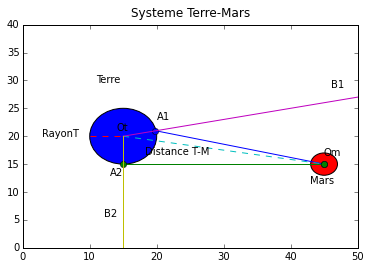

In [100]:
import numpy as np
from math import *
import matplotlib.lines as mlines
from matplotlib import pyplot as plt
from matplotlib import animation

#On définit les limites de notre schéma donc du repère, on donne un titre.
ax = plt.axes(xlim=(0, 50), ylim=(0, 40))
ax.set_title("Systeme Terre-Mars", va='bottom')  

#On établit deux fonctions permettant d'obtenir les deux planètes: 
#Terre et Mars. Les deux fonctions dépend de leur rayon 
#(supposé ici constante car orbite circulaire)
def Mars(RayonM): 
    Mars=plt.Circle((45, 15), RayonM, fc='red')
    return plt.gca().add_patch(Mars)

def Terre(RayonT):               
    Terre= plt.Circle((15, 20), RayonT, fc='blue')
    return plt.gca().add_patch(Terre)    


Terre(5)  #Les valeurs des rayons des deux planètes peuvent être calculés 
Mars(2)   #plus tard en Unité Astronomique (UA).

#On n'oublie surtout pas de tracer le segment reliant le centre de la
#Terre au centre de Masse que l'on appele "Distance T-M"
plt.annotate("Terre", xy = (8, 26), xytext = (20, 20), textcoords = 'offset points')
plt.annotate("Mars", xy = (40, 8), xytext = (20, 20), textcoords = 'offset points')
plt.annotate("Distance T-M", xy = (16, 14), xytext = (15, 15), textcoords = 'offset points')



#On crée un segment qui relie le point A1 au point Om(Origine de Mars)
x1, y1 = [19.75,45],[21,15]   #Coordonnés du segment A1P

#De même on peut créer un segment qui lie les deux points A2 et Om
x2, y2 = [15, 45], [15, 15]   #Coordonnés du segment A2P


plt.annotate("A1", xy = (20, 23), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("A2", xy = (13, 13), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("Ot", xy = (14, 21), xytext = (0, 0), textcoords = 'offset points')
plt.annotate("Om", xy = (45, 16.5), xytext = (0, 0), textcoords = 'offset points')


#On crée maintenant le segment qui relie le centre de la Terre au centre de Mars
X=[15,45]  #Coordonnée des valeurs en x (abscisse) de la distance Terre-Mars
Y=[20,15]  #Coordonnée des valeurs en y (ordonné) de la distance Terre-Mars

#On aura besoin de tracer le rayon de la Terre dans le cas du Parallaxe Diurne
x_rayonTerre=[10,15]         # Traçage du rayon de la Terre en x
y_rayonTerre=[20,20]         # Traçage du rayon de la Terre en y 

plt.annotate("RayonT", xy= (3, 20), xytext = (0, 0), textcoords = 'offset points')

#On trace maintenant la droite entre le point A1 et Ot (Origine Terre)
demi_droite_B1x=[15,50]      #Coordonnées B1 en x 
demi_droite_B1y=[20,27]       #Coordonnées B1 en y

#De même, on trace la droite reliant le point A2 et Ot
demi_droite_B2x=[15,15]    #Coordonnées B2 en x
demi_droite_B2y=[0,20]      #Coordonnées B2 en y

plt.annotate("B1", xy= (44, 26), xytext = (15, 15), textcoords = 'offset points')
plt.annotate("B2", xy= (10, 3), xytext = (15, 15), textcoords = 'offset points')


#Mode de Représentation et d'affichage de toutes les données
plt.plot(x1, y1,x2,y2,marker = 'o')   #On représente les points A1 et A2
plt.plot(x_rayonT,y_rayonT,'--')      #On représente le rayon de la Terre
plt.plot(X,Y,'------')                #On représente la distance entre 
                                      #Centre Terre et Centre Mars

plt.plot(demi_droite_B1x,demi_droite_B1y)
plt.plot(demi_droite_B2x,demi_droite_B2y)

plt.savefig('Kus Travail Parallaxe.png')
plt.show()